In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from joblib import dump
import matplotlib as plt
import joblib

In [5]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #2.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #2.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #2.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #2.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #2.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #2.csv", index_col=0)


In [ ]:
model = LinearSVC(C= 1.0, dual=False, random_state = 10, max_iter=5000)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_val_scaled = scaler.transform(X_val)   
X_test_scaled = scaler.transform(X_test) 

joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [5]:
model.fit(X_train_scaled, y_train.values.ravel())

LinearSVC(dual=False, max_iter=5000, random_state=10)

In [6]:
val_accuracy = model.score(X_val_scaled, y_val)
print(val_accuracy)

0.8693115519253208


In [7]:
test_accuracy = model.score(X_test_scaled, y_test)
print(test_accuracy)

0.8693877551020408


In [8]:
actual_y = y_test.values.ravel()
pred_y = model.predict(X_test_scaled)

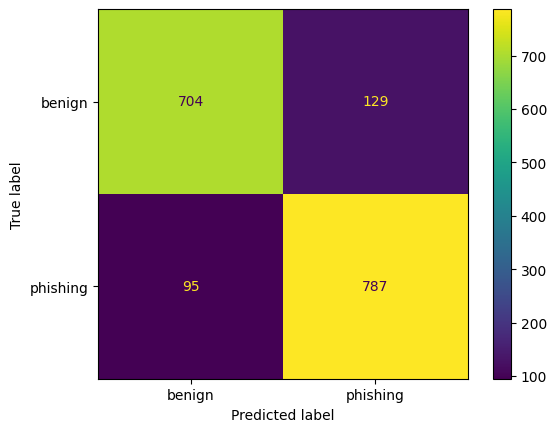

In [9]:
confusion_matrix = metrics.confusion_matrix(actual_y, pred_y)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [10]:
Accuracy = metrics.accuracy_score(actual_y, pred_y)
Precision = metrics.precision_score(actual_y, pred_y)
Recall = metrics.recall_score(actual_y, pred_y)
F1_score = metrics.f1_score(actual_y, pred_y)

In [11]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8693877551020408, 'Precision': 0.8591703056768559, 'Recall': 0.8922902494331065, 'F1_score': 0.8754171301446051}


In [12]:
df = pd.DataFrame({"Model": "LinearSVC", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [13]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.869388,0.85917,0.89229,0.875417


In [14]:
df.to_csv("Metrics of Dataset #2.csv",  index=False)

In [15]:
dump(model, 'LinearSVC #2.joblib')

['LinearSVC #2.joblib']